In [13]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler

# 读出几个表的数据，做特征工程产生新的特征

In [14]:
train_data = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/train.csv',logging=True)
ad = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/ad.csv',logging=True)


   label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  
0               1                 1  
1               1                 2  
2               4                 1  
3               1                 1  
4               1                 1  
/Users/wjj/Desktop/七月在线第七课/data/train.csv 包含一下列
['label' 'clickTime' 'conversionTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']
   creativeID  adID  camgaignID  advertiserID  appID  appPlatform
0        4079  2318         147            80     14            2
1        4565  3593         632             3   

In [72]:
app_categories = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/app_categories.csv',logging=True)


   appID  appCategory
0     14            2
1     25          203
2     68          104
3     75          402
4     83          203
/Users/wjj/Desktop/七月在线第七课/data/app_categories.csv 包含一下列
['appID' 'appCategory']


In [73]:
#应用app分类识别方法取出app推荐位置的类别
app_categories["categories_process_first_class"] = app_categories['appCategory'].apply(categories_process_first_class)
app_categories['categories_process_second_class'] = app_categories['appCategory'].apply(categories_process_second_class)

In [17]:
app_categories.head(5)

,appID,appCategory,categories_process_first_class,categories_process_second_class
0,14,2,NaN,0
1,25,203,2.0,3
2,68,104,1.0,4
3,75,402,4.0,2
4,83,203,2.0,3


In [18]:
user = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/user.csv',logging=True)

   userID  age  gender  education  marriageStatus  haveBaby  hometown  \
0       1   42       1          0               2         0       512   
1       2   18       1          5               1         0      1403   
2       3    0       2          4               0         0         0   
3       4   21       2          5               3         0       607   
4       5   22       2          0               0         0         0   

   residence  
0        503  
1       1403  
2          0  
3        607  
4       1301  
/Users/wjj/Desktop/七月在线第七课/data/user.csv 包含一下列
['userID' 'age' 'gender' 'education' 'marriageStatus' 'haveBaby'
 'hometown' 'residence']


In [19]:
user.age.value_counts()

0     294271
15    150175
16    120322
17    115704
19    115692
13    114651
20    112301
18    110549
14    107356
25     99378
21     96306
26     92987
22     91733
12     88838
23     87728
27     84934
28     80358
24     79479
11     78679
29     68688
30     55187
31     47475
33     43033
32     41638
10     39061
34     34062
35     33106
36     29333
37     26512
38     21280
       ...  
6       3924
5       3395
54      2193
55      2111
4       1959
56      1795
57      1771
58      1527
59      1362
60      1100
61       923
62       412
63       292
66       285
65       266
64       234
67       220
80       165
68       145
69       124
70       123
71       104
78        89
73        87
74        86
76        85
75        81
72        77
77        72
79        55
Name: age, Length: 81, dtype: int64

In [20]:
#看一下用户年龄分布，找到适合的切分点，要按人数等分而不是按年龄，发现十几岁用户居多
import matplotlib.pyplot as plt
user.age.value_counts().plot()
plt.show()

<Figure size 640x480 with 1 Axes>

In [21]:
#处理user信息
user['age_process'] = user['age'].apply(age_process)
user['hometown_province'] = user['hometown'].apply(process_province)
user['hometown_city'] = user['hometown'].apply(process_city)
user['residence_province'] = user['residence'].apply(process_province)
user['residence_city'] = user['residence'].apply(process_city)
user

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,age_process,hometown_province,hometown_city,residence_province,residence_city
0,1,42,1,0,2,0,512,503,4,51,2,50,3
1,2,18,1,5,1,0,1403,1403,2,14,3,14,3
2,3,0,2,4,0,0,0,0,0,0,0,0,0
3,4,21,2,5,3,0,607,607,2,60,7,60,7
4,5,22,2,0,0,0,0,1301,2,0,0,13,1
5,6,20,2,0,0,0,301,2301,2,30,1,23,1
6,7,17,1,5,0,0,313,313,2,31,3,31,3
7,8,21,1,2,3,1,1607,1607,2,16,7,16,7
8,9,38,2,2,2,0,2203,2203,3,22,3,22,3
9,10,13,2,0,0,0,0,2203,1,0,0,22,3


In [72]:
#0岁代表没有数据，所以在看数据的时候要剔除
user[user.age!=0].describe()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,age_process,hometown_province,hometown_city,residence_province,residence_city
count,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06
mean,1.393745e+06,2.277593e+01,1.410284e+00,1.975580e+00,1.017286e+00,3.033893e-01,7.372152e+02,9.797279e+02,2.252490e+00,2.312017e+01,2.873596e+00,2.879952e+01,3.668985e+00
std,8.105652e+05,9.675687e+00,5.321244e-01,1.577530e+00,9.508679e-01,8.098684e-01,7.746096e+02,7.855014e+02,8.460603e-01,2.472208e+01,3.033409e+00,2.273902e+01,2.994358e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.903605e+05,1.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050000e+02,2.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.000000e+00
50%,1.388503e+06,2.100000e+01,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,5.030000e+02,8.030000e+02,2.000000e+00,1.600000e+01,2.000000e+00,2.000000e+01,3.000000e+00
75%,2.095096e+06,2.800000e+01,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.301000e+03,1.513000e+03,3.000000e+00,3.000000e+01,5.000000e+00,4.000000e+01,6.000000e+00
max,2.805118e+06,8.000000e+01,2.000000e+00,7.000000e+00,3.000000e+00,6.000000e+00,3.401000e+03,3.401000e+03,5.000000e+00,9.100000e+01,1.600000e+01,9.100000e+01,1.800000e+01


In [73]:
train_data.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [22]:
train_data['clickTime_day'] = train_data['clickTime'].apply(get_time_day)
train_data['clickTime_hour'] = train_data['clickTime'].apply(get_time_hour)

In [75]:
train_data.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour
0,0,170000,NaN,3089,2798058,293,1,1,17,0
1,0,170000,NaN,1259,463234,6161,1,2,17,0
2,0,170000,NaN,4465,1857485,7434,4,1,17,0
3,0,170000,NaN,1004,2038823,977,1,1,17,0
4,0,170000,NaN,1887,2015141,3688,1,1,17,0


In [23]:
test_data = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/test.csv',logging=True)
test_data['clickTime_day'] = test_data['clickTime'].apply(get_time_day)
test_data['clickTime_hour'] = test_data['clickTime'].apply(get_time_hour)

   instanceID  label  clickTime  creativeID   userID  positionID  \
0           1     -1     310000        3745  1164848        3451   
1           2     -1     310000        2284  2127247        1613   
2           3     -1     310000        1456  2769125        5510   
3           4     -1     310000        4565     9762        4113   
4           5     -1     310000          49  2513636        3615   

   connectionType  telecomsOperator  
0               1                 3  
1               1                 3  
2               2                 1  
3               2                 3  
4               1                 3  
/Users/wjj/Desktop/七月在线第七课/data/test.csv 包含一下列
['instanceID' 'label' 'clickTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']


# 合并几张表，并切分训练和测试数据

In [24]:
train_user = pd.merge(train_data, user, on='userID')
train_user_ad = pd.merge(train_user, ad, on='creativeID')


In [25]:
train_user_ad_app = pd.merge(train_user_ad,app_categories,on='appID')

In [26]:
train_user_ad_app.describe()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,...,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,categories_process_first_class,categories_process_second_class
count,3.749528e+06,3.749528e+06,93262.000000,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,...,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.270795e+06,3.749528e+06
mean,2.487300e-02,2.418317e+05,242645.358013,3.261575e+03,1.405349e+06,3.702799e+03,1.222590e+00,1.605879e+00,2.403944e+01,1.934587e+00,...,2.753816e+01,3.560234e+00,2.005435e+03,4.155907e+02,2.776200e+01,3.703212e+02,1.217947e+00,1.819372e+02,2.015659e+00,5.851555e+00
std,1.557380e-01,3.958793e+04,39285.385532,1.829643e+03,8.088094e+05,1.923724e+03,5.744428e-01,8.491127e-01,3.954420e+00,9.674365e-01,...,2.271045e+01,3.020678e+00,1.250836e+03,2.134300e+02,3.274570e+01,1.440570e+02,4.128515e-01,1.032034e+02,8.295684e-01,3.682285e+00
min,0.000000e+00,1.700000e+05,170005.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.116270e+05,211626.000000,1.540000e+03,7.058698e+05,2.579000e+03,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,...,1.200000e+01,1.000000e+00,7.610000e+02,2.050000e+02,3.000000e+00,3.600000e+02,1.000000e+00,1.040000e+02,2.000000e+00,2.000000e+00
50%,0.000000e+00,2.418390e+05,242106.000000,3.465000e+03,1.407062e+06,3.322000e+03,1.000000e+00,1.000000e+00,2.400000e+01,2.000000e+00,...,2.000000e+01,3.000000e+00,1.977000e+03,4.600000e+02,3.000000e+00,4.650000e+02,1.000000e+00,2.090000e+02,2.000000e+00,9.000000e+00
75%,0.000000e+00,2.722170e+05,272344.000000,4.565000e+03,2.105989e+06,4.896000e+03,1.000000e+00,2.000000e+00,2.700000e+01,3.000000e+00,...,4.000000e+01,6.000000e+00,3.242000e+03,6.320000e+02,5.600000e+01,4.650000e+02,1.000000e+00,2.090000e+02,2.000000e+00,9.000000e+00
max,1.000000e+00,3.023590e+05,302359.000000,6.582000e+03,2.805118e+06,7.645000e+03,4.000000e+00,3.000000e+00,3.000000e+01,3.000000e+00,...,9.100000e+01,1.800000e+01,3.616000e+03,7.200000e+02,9.100000e+01,4.720000e+02,2.000000e+00,5.030000e+02,5.000000e+00,9.000000e+00


In [27]:
x_user_ad_app = train_user_ad_app.loc[:,['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class']]

/Users/wjj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [82]:
x_user_ad_app

,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,age,gender,education,...,hometown_city,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,app_categories_first_class,app_categories_second_class
0,3089,2798058,293,1,1,17,0,25,2,1,...,0,13,1,1321,83,10,434,1,NaN,NaN
1,3089,195578,3659,0,2,17,0,27,2,2,...,1,13,1,1321,83,10,434,1,NaN,NaN
2,3089,1462213,3659,0,3,17,0,35,2,0,...,0,13,1,1321,83,10,434,1,NaN,NaN
3,3089,1985880,5581,1,1,17,0,26,1,1,...,0,0,0,1321,83,10,434,1,NaN,NaN
4,3089,2152167,5581,1,1,17,0,23,1,0,...,4,13,3,1321,83,10,434,1,NaN,NaN
5,3089,2152167,5581,1,1,17,0,23,1,0,...,4,13,3,1321,83,10,434,1,NaN,NaN
6,3089,814178,5617,0,2,17,2,0,2,0,...,0,13,6,1321,83,10,434,1,NaN,NaN
7,3089,808237,3659,0,2,22,1,14,1,0,...,1,13,1,1321,83,10,434,1,NaN,NaN
8,3089,2593794,3659,0,2,17,0,15,2,1,...,1,13,1,1321,83,10,434,1,NaN,NaN
9,3089,1563526,5079,2,2,22,1,48,1,4,...,5,13,3,1321,83,10,434,1,NaN,NaN


In [28]:
#特征部分本来是int64，压缩成int32，节约储存空间，如果不是有ID特征在，还可以压缩到更小。先取出值values再压缩
#同时，如果不转int32，后面fit的时候会报错有空值以至于无法计算，哪怕填充了空值也没用，所以这里必须转int32
x_user_ad_app = np.array(x_user_ad_app.values,dtype='int32')

In [29]:
y_user_ad_app = train_user_ad_app.loc[:,['label']].values

# 用随机森林看了一下特征重要性，进行进一步特征挖掘

In [30]:
#随机森林,交叉验证集，数据切分到引入
#树模型的ID等特征可以当作特征直接训练，但是其他模型需要进行onehot编码（ID），否则会认为ID之间有大小关系
#年龄在除了树模型外的其他模型中需要做离散化（年龄）
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
feat_labels = np.array(['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class'])
#数的数量为100，随机种子random_state
forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

In [31]:
forest.fit(x_user_ad_app,y_user_ad_app)

/Users/wjj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
#特征重要性
importances = forest.feature_importances_

In [33]:
#按重要程度从高到低排列,重要度越高越需要更深的特征挖掘，也就是再加工
indices = np.argsort(importances)[::-1]

 1) userID                         0.165072
 2) residence                      0.099218
 3) clickTime_day                  0.077277
 4) age                            0.075471
 5) positionID                     0.065426
 6) residence_province             0.063809
 7) residence_city                 0.058211
 8) hometown_province              0.053386
 9) education                      0.048571
10) hometown_city                  0.047720
11) clickTime_hour                 0.039285
12) telecomsOperator               0.032073
13) marriageStatus                 0.031546
14) creativeID                     0.029861
15) adID                           0.020425
16) haveBaby                       0.018434
17) camgaignID                     0.017714
18) age_process                    0.015907
19) advertiserID                   0.012847
20) gender                         0.012654
21) appID                          0.009894
22) connectionType                 0.004184
23) appPlatform                 

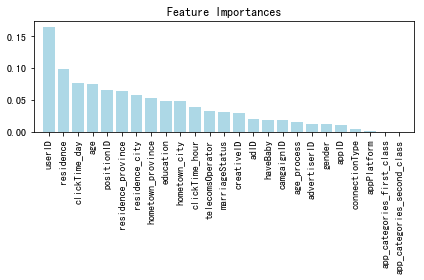

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(x_user_ad_app.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_user_ad_app.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_user_ad_app.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_user_ad_app.shape[1]])
plt.tight_layout()
#可以储存这张图片
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

# 训练随机森林模型并用网格搜索调参(不是应该用XGBoost+LR？）

In [35]:
#网格搜索
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
#'n_estimators': [100],
param_grid = {
              'n_estimators': [10, 100, 500, 1000],
              'max_features':[0.6, 0.7, 0.8, 0.9]
             }
rf = RandomForestClassifier()

In [38]:
#网格搜索调参：https://blog.csdn.net/u012328159/article/details/84669266
rfc = GridSearchCV(rf, param_grid, scoring='neg_log_loss', cv=3, n_jobs=2)


In [39]:
rfc.fit(x_user_ad_app, y_user_ad_app)
print(rfc.best_score_)
print(rfc.best_params_)

KeyboardInterrupt: 

In [ ]:
train_user_ad_app.head()

# 解决正负样本不平衡问题

In [40]:
#正负样本数量
positive_num = train_user_ad_app[train_user_ad_app['label']==1].values.shape[0]
negative_num = train_user_ad_app[train_user_ad_app['label']==0].values.shape[0]

In [42]:
negative_num / positive_num 

39.20424181338595

In [48]:
from blagging import BlaggingClassifier


In [50]:
#base_estimator可选择基学习器，默认为决策树，例如    blag_boost = BlaggingClassifier(base_estimator=xgboost, random_state=42, n_jobs=-1)
#help(BlaggingClassifier)可看帮助文档

blagging = BlaggingClassifier(n_jobs=-1)

In [51]:
blagging.fit(x_user_ad_app, y_user_ad_app)

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BlaggingClassifier(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [58]:
test_user = pd.merge(test_data, user, on='userID')


In [86]:
test_user_ad = pd.merge(test_user, ad, on='creativeID')
test_user_ad_app = pd.merge(test_user_ad,app_categories,on='appID')
x_user_ad_app_test = test_user_ad_app.loc[:,['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class']]
y_user_ad_app_test = train_user_ad_app.loc[:,['label']]

In [87]:
test_user_ad_app

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,...,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,categories_process_first_class,categories_process_second_class
0,1,-1,310000,3745,1164848,3451,1,3,31,0,...,60,5,1166,430,80,14,2,2,NaN,0
1,9,-1,310000,3745,1113275,3347,1,2,31,0,...,50,4,1166,430,80,14,2,2,NaN,0
2,43,-1,310000,3745,1215329,3347,1,1,31,0,...,50,4,1166,430,80,14,2,2,NaN,0
3,83,-1,310000,3745,2077956,3347,1,2,31,0,...,16,10,1166,430,80,14,2,2,NaN,0
4,108,-1,310000,3745,2343346,7422,1,1,31,0,...,13,3,1166,430,80,14,2,2,NaN,0
5,119,-1,310000,3745,2015849,3307,1,2,31,0,...,10,7,1166,430,80,14,2,2,NaN,0
6,134,-1,310000,3745,2600333,3498,1,2,31,0,...,20,6,1166,430,80,14,2,2,NaN,0
7,136,-1,310000,3745,587017,4077,1,2,31,0,...,0,0,1166,430,80,14,2,2,NaN,0
8,162,-1,310001,3745,1715446,5648,1,1,31,0,...,16,1,1166,430,80,14,2,2,NaN,0
9,178,-1,310001,3745,2170066,3451,1,2,31,0,...,90,6,1166,430,80,14,2,2,NaN,0


In [100]:

x_user_ad_app_test = np.array(x_user_ad_app_test.values,dtype='int32')

In [76]:
y_user_ad_app_test.columns

Index(['label'], dtype='object')

In [98]:
x_user_ad_app_test.fillna('100')


,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,age,gender,education,...,hometown_city,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,app_categories_first_class,app_categories_second_class
0,3745,1164848,3451,1,3,31,0,29,2,1,...,5,60,5,1166,430,80,14,2,100,100
1,3745,1113275,3347,1,2,31,0,23,2,3,...,0,50,4,1166,430,80,14,2,100,100
2,3745,1215329,3347,1,1,31,0,28,2,2,...,4,50,4,1166,430,80,14,2,100,100
3,3745,2077956,3347,1,2,31,0,33,2,1,...,10,16,10,1166,430,80,14,2,100,100
4,3745,2343346,7422,1,1,31,0,11,2,3,...,0,13,3,1166,430,80,14,2,100,100
5,3745,2015849,3307,1,2,31,0,37,2,1,...,0,10,7,1166,430,80,14,2,100,100
6,3745,2600333,3498,1,2,31,0,34,2,1,...,0,20,6,1166,430,80,14,2,100,100
7,3745,587017,4077,1,2,31,0,6,2,0,...,0,0,0,1166,430,80,14,2,100,100
8,3745,1715446,5648,1,1,31,0,26,0,1,...,0,16,1,1166,430,80,14,2,100,100
9,3745,2170066,3451,1,2,31,0,2,2,2,...,6,90,6,1166,430,80,14,2,100,100


In [101]:
np.isnan(x_user_ad_app_test).any()

False

In [102]:
blagging.predict_proba(x_user_ad_app_test)

array([[0.9 , 0.1 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.75, 0.25],
       [0.4 , 0.6 ],
       [0.9 , 0.1 ]])

In [112]:
#scale 超参数
scale = 10
result_predict_prob = []
result_predict=[]
for i in range(scale):
    result_indiv = blagging[i].predict(x_user_ad_app_test)
    result_indiv_proba = blagging[i].predict_proba(x_user_ad_app_test)[:,1]
    result_predict.append(result_indiv)
    result_predict_prob.append(result_indiv_proba)


result_predict_prob = np.reshape(result_predict_prob,[-1,scale])
result_predict = np.reshape(result_predict,[-1,scale])

result_predict_prob = np.mean(result_predict_prob,axis=1)
#result_predict = max_count(result_predict)


result_predict_prob = np.array(result_predict_prob).reshape([-1,1])


test_data['prob'] = result_predict_prob
test_data = test_data.loc[:,['instanceID','prob']]
#结果输出
test_data.to_csv('/Users/wjj/Desktop/github/点击率预估/predict.csv',index=False)
print("prediction done!")

TypeError: 'GridSearchCV' object does not support indexing